In [1]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages")

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

In [3]:
img = cv2.imread("/Users/sanjanaattanayake/Documents/Stellar Forge.jpeg", cv2.IMREAD_UNCHANGED) # cv2.imread(path, flag) default_flag = cv2.IMREAD_COLOR
print(img.shape) # rows, columns, channels (BGR = 3, Greyscale = None)
print(img.size)

#print(img[504, 600]) # BGR values at (x,y) pixel
#cv2.namedWindow("Image")
#cv2.imshow("Image", img)
#cv2.waitKey(0)
#cv2.destroyWindow("Image")
#cv2.waitKey(1)

(1204, 1280, 3)
4623360


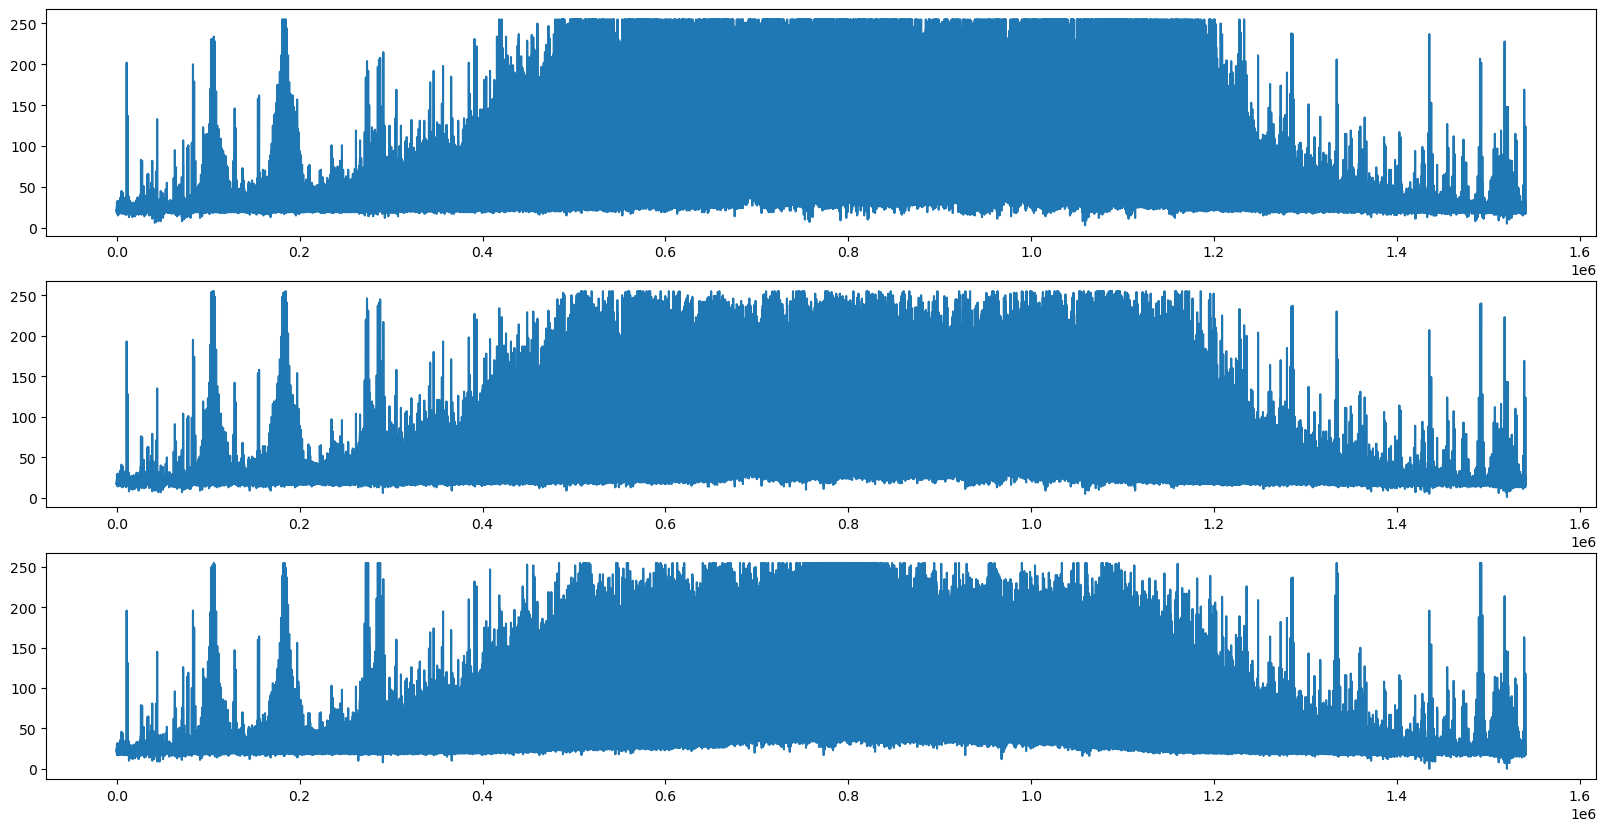

In [4]:
xpoints = np.arange(0, img.shape[0]*img.shape[1], 1, dtype=int) #img.shape[0]*img.shape[1]

yBlue = [] #np.array(img[:, :, 0])       
yGreen = [] #np.array(img[:, :, 1])
yRed = [] #np.array(img[:, :, 2])

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        yBlue.append(img[i, j][0])
        yGreen.append(img[i, j][1])
        yRed.append(img[i, j][2])
        
yBlue = np.array(yBlue)
yGreen = np.array(yGreen)
yRed = np.array(yRed)

plt.figure(figsize=(20,10))

plt.subplot(3,1,1) # row = 1, col = 3, 1st position plt.plot(xpoints, yBlue[0:10000])
plt.plot(xpoints, yBlue)

plt.subplot(3,1,2) # row = 1, col = 3, 2nd position plt.plot(xpoints, yGreen[0:10000])
plt.plot(xpoints, yGreen)

plt.subplot(3,1,3) # row = 1, col = 3, 3rd position plt.plot(xpoints, yRed[0:10000])
plt.plot(xpoints, yRed)

plt.show()

In [5]:
# Visible spectrum (400nm - 700nm)
# RGB = 0 - 255
# Ochestral frequencies 29.1 (Contra Basoon) - 3322.4 (Harp)

speed_of_light = 3*pow(10,8)
blueFrequencies = []

for i in range(len(yBlue)):
    wavelength = (300*yBlue[i])/255
    frequency = speed_of_light / wavelength
    blueFrequencies.append(frequency)
    
print(blueFrequencies[0:20])    

[12142857.142857142, 12142857.142857142, 12142857.142857142, 12142857.142857142, 11590909.09090909, 11590909.09090909, 11086956.52173913, 11086956.52173913, 12142857.142857142, 12142857.142857142, 12142857.142857142, 12142857.142857142, 11590909.09090909, 11590909.09090909, 12142857.142857142, 12750000.0, 12142857.142857142, 12142857.142857142, 12142857.142857142, 11590909.09090909]


In [6]:
minFrequency = min(blueFrequencies)
maxFrequency = max(blueFrequencies)

for i in range(len(blueFrequencies)):
    blueFrequencies[i] = (((blueFrequencies[i] - minFrequency)*(3322.4 - 29.1)) / (maxFrequency-minFrequency)) + 29.1

print(blueFrequencies[0:20])      

[465.96632653061226, 465.96632653061226, 465.96632653061226, 465.96632653061226, 444.3266774891774, 444.3266774891774, 424.5687370600414, 424.5687370600414, 465.96632653061226, 465.96632653061226, 465.96632653061226, 465.96632653061226, 444.3266774891774, 444.3266774891774, 465.96632653061226, 489.7699404761905, 465.96632653061226, 465.96632653061226, 465.96632653061226, 444.3266774891774]


In [8]:
def get_sine_wave(frequency, duration, sample_rate = 44100, amplitude = 2048):
    t = np.linspace(0, duration, int(sample_rate * duration)) # linspace - Return evenly spaced numbers over a specified interval.
    wave = amplitude * np.sin(2*np.pi*frequency*t)
    return wave
    
wave = 0.0  
for i in range(0,1000):
    wave = get_sine_wave(blueFrequencies[i], duration=2, amplitude=2048)
wavfile.write("test1.wav", rate=44100, data = wave.astype(np.int16))